# Prediction of survival of a person in Titanic Ship -Logistic Regression

In [92]:
import numpy as np
import pandas as pd

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
train=pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

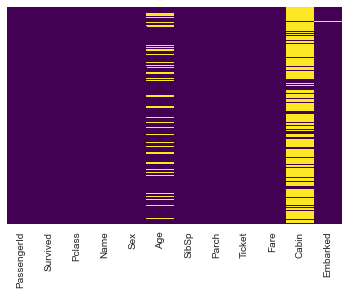

In [95]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
train.columns

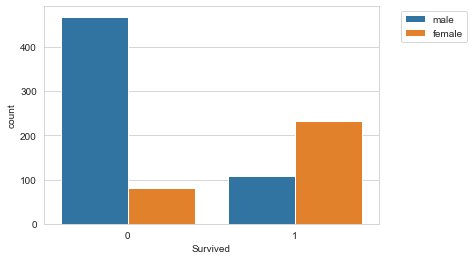

In [96]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Sex')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

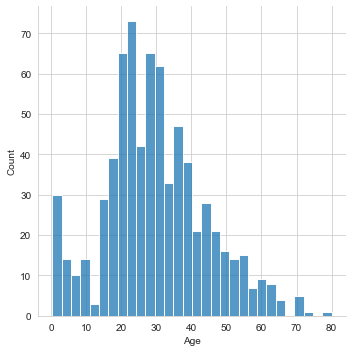

In [97]:
sns.displot(train['Age'].dropna(),kde=False,bins=30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


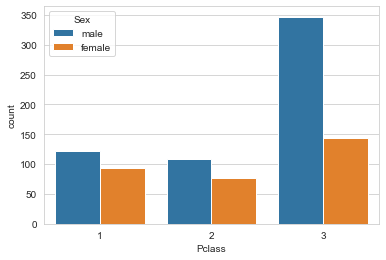

In [98]:
sns.countplot(x='Pclass',data=train,hue='Sex')
train.head()

In [99]:
import cufflinks as cf #for interactive plot
cf.go_offline()


In [100]:
train['Fare'].iplot(kind='hist',bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

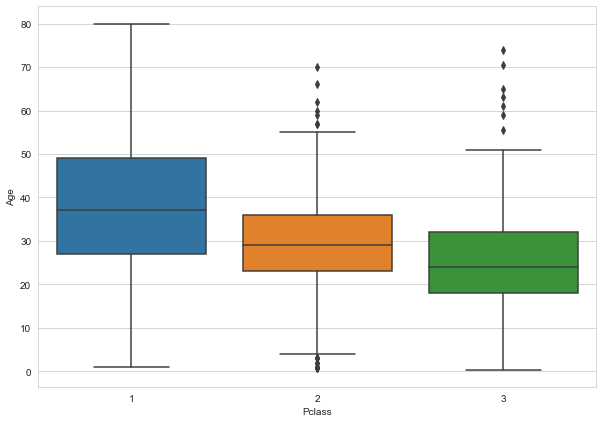

In [101]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [102]:
def impute_age(cols):  #for filling missing age value in our data
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24 #returning avereage age according to the Pclass.refer previous graph
    else:
        return Age
    

In [103]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

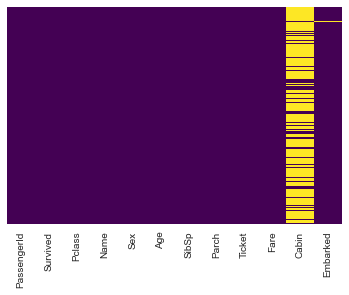

In [104]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [105]:
train.drop('Cabin',axis=1,inplace=True)

In [106]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

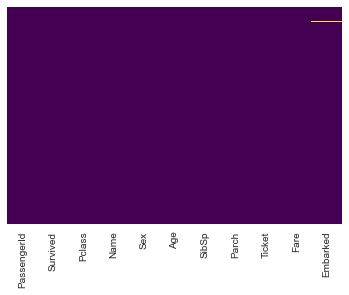

In [107]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [108]:
train.dropna(inplace=True)

<AxesSubplot:>

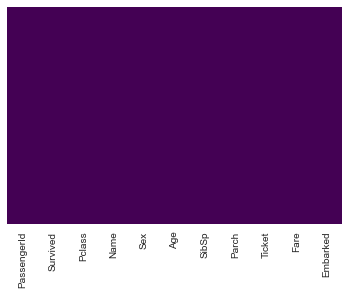

In [109]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [110]:
#now dealing with categorical variables:

sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [111]:
train=pd.concat([train,Sex,embark],axis=1)


In [112]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [113]:
train.drop(['Sex','Name','Ticket','Embarked','PassengerId'],axis=1,inplace=True)

In [114]:

train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [115]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [116]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
lr=LogisticRegression()

In [127]:
lr.fit(x_train,y_train)

C:\Users\Sree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [128]:
pred=lr.predict(x_test)

In [129]:
from sklearn.metrics import classification_report

In [130]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [131]:
from sklearn.metrics import confusion_matrix

In [132]:
confusion_matrix(y_test,pred)

array([[147,  16],
       [ 30,  74]], dtype=int64)